#PREPARATIONS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Define the file paths and column names for each plot
plot_files = {
    1: {'file_path':'/content/drive/MyDrive/projects/Thesis/data/SWC/calibrated_data/SWC_plot1.xlsx', 'sensor_cols': ['10_swc_p1_a', '20_swc_p1_a', '10_swc_p1_b', '20_swc_p1_b']},
    2: {'file_path':'/content/drive/MyDrive/projects/Thesis/data/SWC/calibrated_data/SWC_plot2.xlsx', 'sensor_cols': ['10_swc_p2_a', '20_swc_p2_a', '10_swc_p2_b', '20_swc_p2_b']},
    3: {'file_path':'/content/drive/MyDrive/projects/Thesis/data/SWC/calibrated_data/SWC_plot3.xlsx', 'sensor_cols': ['10_swc_p3_a', '20_swc_p3_a', '10_swc_p3_b', '20_swc_p3_b']},
    5: {'file_path':'/content/drive/MyDrive/projects/Thesis/data/SWC/calibrated_data/SWC_plot5.xlsx', 'sensor_cols': ['10_swc_p5_a', '20_swc_p5_a', '10_swc_p5_b', '20_swc_p5_b']},
    6: {'file_path':'/content/drive/MyDrive/projects/Thesis/data/SWC/calibrated_data/SWC_plot6.xlsx', 'sensor_cols': ['10_swc_p6_a', '20_swc_p6_a']}
}

#PRESENTATION

load the data to "all_plot_data" dataframe

In [7]:
# Dictionary to store the data for each plot
plot_data = {}

# Option to drop rows with 0 or negative values
drop_zero_negative = True

# Read data from Excel files and calculate average SWC for each plot
for plot_id, plot_info in plot_files.items():
    file_path = plot_info['file_path']
    sensor_columns = plot_info['sensor_cols']

    # Read the data
    data = pd.read_excel(file_path, parse_dates=['Datetime'])

    # Parse the 'DateTime' column
    data['Datetime'] = pd.to_datetime(data['Datetime'])
    # Filter out rows with 'DateTime' before 2021
    data = data[data['Datetime'] >= '2021-01-01']

    # Add a Plot column to identify the data
    data['Plot'] = plot_id

    # Replace 0 or negative values with NaN
    data[sensor_columns] = data[sensor_columns].applymap(lambda x: np.nan if x <= 0 else x)

    # Calculate the average SWC across all sensors for each 'DateTime'
    data['SWC_Average'] = data[sensor_columns].mean(axis=1)

    data['Plot'] = plot_id  # Ensure 'Plot' column is preserved after groupby

    # Store the necessary columns in the plot_data dictionary
    plot_data[plot_id] = data[['Datetime', 'SWC_Average', 'Plot']]

# Check if plot_data is empty (i.e., no valid data was loaded)
if not plot_data:
    print("No valid data loaded.")
else:
  # Create a single DataFrame with all plot data, adding 'Plot' identifier
  all_plot_data = pd.concat(plot_data.values(), ignore_index=True)

<ipython-input-7-f10189d59e9a>:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[sensor_columns] = data[sensor_columns].applymap(lambda x: np.nan if x <= 0 else x)
<ipython-input-7-f10189d59e9a>:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[sensor_columns] = data[sensor_columns].applymap(lambda x: np.nan if x <= 0 else x)
<ipython-input-7-f10189d59e9a>:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[sensor_columns] = data[sensor_columns].applymap(lambda x: np.nan if x <= 0 else x)
<ipython-input-7-f10189d59e9a>:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[sensor_columns] = data[sensor_columns].applymap(lambda x: np.nan if x <= 0 else x)
<ipython-input-7-f10189d59e9a>:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[sensor_columns] = data[sensor_columns].applymap(

plot graphs

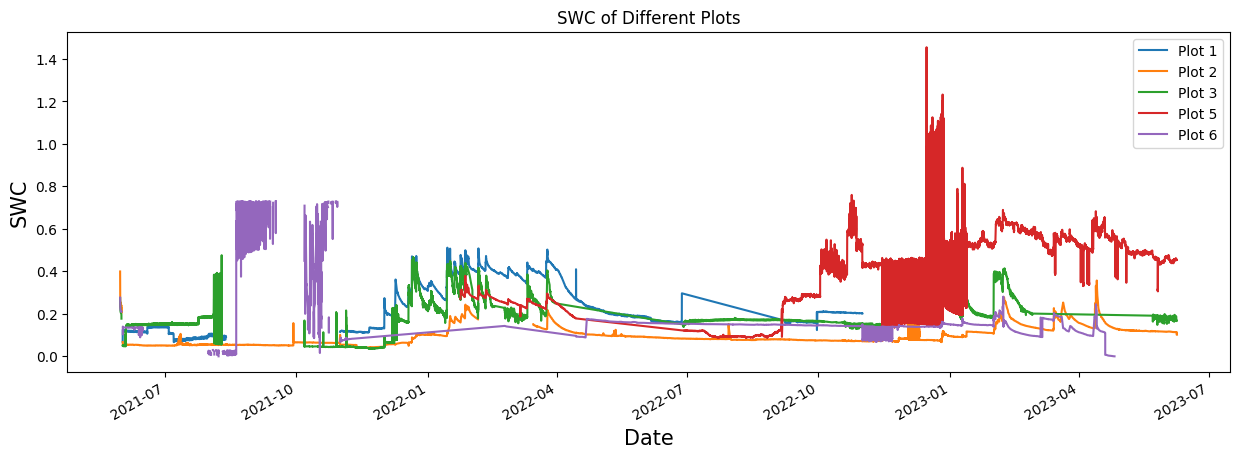

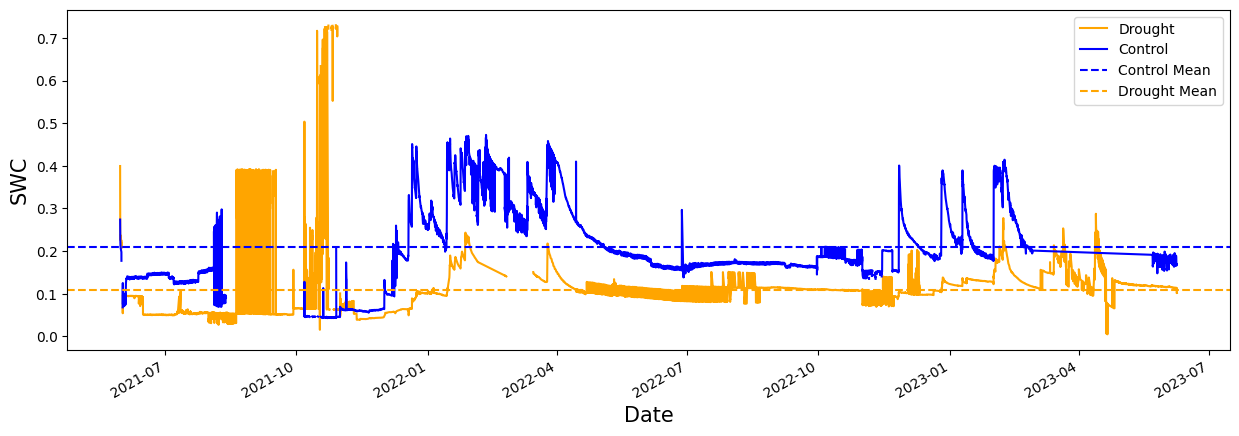

In [8]:


  # Graph 1: SWC of different plots over time
  fig, ax = plt.subplots(figsize=(15, 5))
  for plot_id, group in all_plot_data.groupby('Plot'):
      ax.plot(group['Datetime'], group.iloc[:, 1:2].mean(axis=1), label=f'Plot {plot_id}')
  ax.set_xlabel('Date', fontsize = 15)
  ax.set_ylabel('SWC', fontsize = 15)
  ax.set_title('SWC of Different Plots')
  ax.legend()
  #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
  fig.autofmt_xdate()
  plt.show()

  # Graph 2: Mean SWC of drought and control plots
  drought_plots = [2, 6]
  control_plots = [1, 3]

  # Extracting and averaging data for drought and control plots
  drought_data = all_plot_data[all_plot_data['Plot'].isin(drought_plots)]
  control_data = all_plot_data[all_plot_data['Plot'].isin(control_plots)]

  # Group by date and calculate mean SWC for drought and control
  drought_mean = drought_data.groupby('Datetime')['SWC_Average'].mean()
  control_mean = control_data.groupby('Datetime')['SWC_Average'].mean()

  #add horizontal lines for the mean values
  control_mean_value = np.mean(control_mean)
  drought_mean_value = np.mean(drought_mean)

  fig, ax = plt.subplots(figsize=(15, 5))
  ax.plot(drought_mean.index, drought_mean, label='Drought', color = 'orange')
  ax.plot(control_mean.index, control_mean, label='Control', color = 'blue')
  plt.axhline(y=control_mean_value, color='blue', linestyle='--', label='Control Mean')
  plt.axhline(y=drought_mean_value, color='orange', linestyle='--', label='Drought Mean')
  ax.set_xlabel('Date', fontsize = 15)
  ax.set_ylabel('SWC', fontsize = 15)
  #ax.set_title('Mean SWC of Drought and Control Plots')
  ax.legend()
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
  fig.autofmt_xdate()
  plt.show()

more plotting and sandbox:

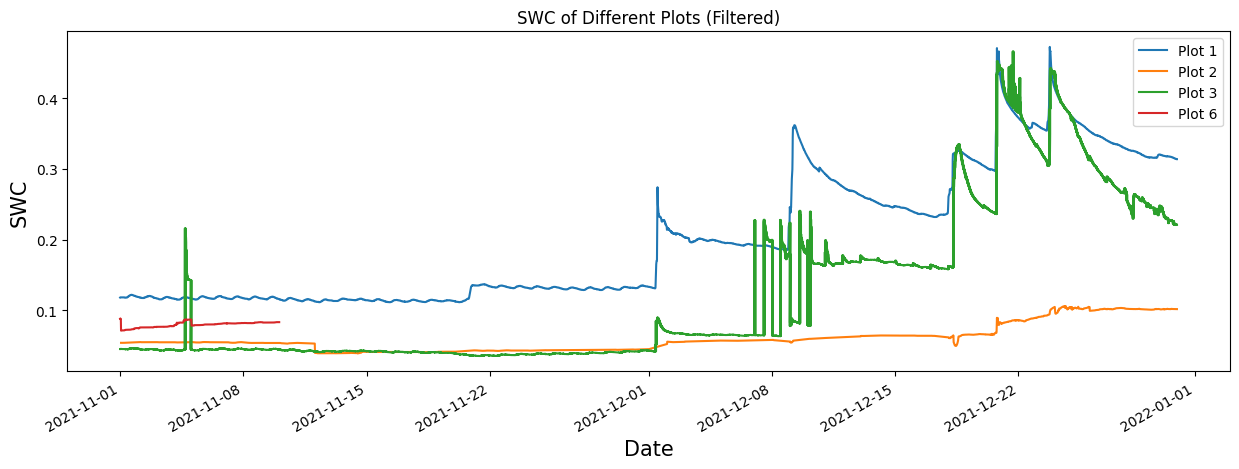

In [6]:
# Define the date range you're interested in
start_date = '2021-10-01'
end_date = '2021-12-31'

# Filter the data for the specified date range
filtered_plot_data = all_plot_data[(all_plot_data['Datetime'] >= start_date) & (all_plot_data['Datetime'] <= end_date)]

# Graph 1: SWC of different plots over time (for the filtered date range)
fig, ax = plt.subplots(figsize=(15, 5))
for plot_id, group in filtered_plot_data.groupby('Plot'):
    ax.plot(group['Datetime'], group.iloc[:, 1:2].mean(axis=1), label=f'Plot {plot_id}')
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('SWC', fontsize=15)
ax.set_title('SWC of Different Plots (Filtered)')
ax.legend()
fig.autofmt_xdate()
plt.show()